In [1]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report ,roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from scipy.stats import chi2_contingency, f_oneway
from sklearn.model_selection import train_test_split, GridSearchCV
import lightgbm as lgb
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV







In [ ]:
#read the dataset depression
df=pd.read_csv(r"C:\Users\arwah\OneDrive\Desktop\HealthCare Project\datasets\Student Depression Dataset.csv")
df.head(9)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
5,33,Male,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,Less than 5 hours,Healthy,PhD,No,4.0,1.0,No,0
6,52,Male,30.0,Thane,Student,3.0,0.0,9.54,4.0,0.0,7-8 hours,Healthy,BSc,No,1.0,2.0,No,0
7,56,Female,30.0,Chennai,Student,2.0,0.0,8.04,4.0,0.0,Less than 5 hours,Unhealthy,Class 12,No,0.0,1.0,Yes,0
8,59,Male,28.0,Nagpur,Student,3.0,0.0,9.79,1.0,0.0,7-8 hours,Moderate,B.Ed,Yes,12.0,3.0,No,1


In [3]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [5]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [6]:
df.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(27898, 18)

In [11]:
count1 = df[df['Gender'] == "Male"].shape[0]
print(count1)
count2= df[df['Gender'] == "Female"].shape[0]
print(count2)
count3=df[df['Gender'] == "Other"].shape[0]
print(count3)
count1+count2+count3


15546
12352
0


27898

In [ ]:
# df = df[df["gender"] != "Other"]


In [ ]:
# df.shape

In [12]:
count1= df[df['Depression'] == 1].shape[0]
count2= df[df['Depression'] == 0].shape[0]
count1+count2


27898

In [13]:
count1= df[df['Family History of Mental Illness'] == "No"].shape[0]
count2= df[df['Family History of Mental Illness'] == "Yes"].shape[0]
count1+count2

27898

In [ ]:
# count1= df[df['heart_disease'] == 1].shape[0]
# count2= df[df['heart_disease'] == 0].shape[0]
# count1+count2

In [ ]:
# count1= df[df['Family History'] == "No"].shape[0]
# count2= df[df['Family History'] == "Yes"].shape[0]
# count1+count2

In [ ]:
# #check dublicates
# duplicated_data=df.duplicated()
# print(duplicated_data)


In [ ]:
# duplicates = df[df.duplicated(keep=False)]
# print(duplicates)

In [ ]:
# #remove duplicates if exists
# df.drop_duplicates(inplace=True)
# df.duplicated().sum()

In [ ]:
# #check null values
# df.isna()
# rows_with_nan = df[df.isna().any(axis=1)]
# print(rows_with_nan)



In [14]:
df.nunique()

id                                       27898
Gender                                       2
Age                                         34
City                                        52
Profession                                  14
Academic Pressure                            6
Work Pressure                                3
CGPA                                       332
Study Satisfaction                           6
Job Satisfaction                             5
Sleep Duration                               5
Dietary Habits                               4
Degree                                      28
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             5
Family History of Mental Illness             2
Depression                                   2
dtype: int64

In [15]:
#Identify  inconsistencies
print(df['Academic Pressure'].unique())
print(df['Age'].unique())


[5. 2. 3. 4. 1. 0.]
[33. 24. 31. 28. 25. 29. 30. 27. 19. 20. 23. 18. 21. 22. 34. 32. 26. 39.
 35. 42. 36. 58. 49. 38. 51. 44. 43. 46. 59. 54. 48. 56. 37. 41.]


In [23]:
# decimal_ages = df[df['age'] % 1 != 0].index
# decimal_ages

In [24]:
# decimal_ages.value_counts().sum()

In [ ]:
# df.drop(index=decimal_ages, inplace=True)

# df.reset_index(drop=True, inplace=True)

In [16]:
print(df['Dietary Habits'].unique())
print(df['Work/Study Hours'].unique())


['Healthy' 'Moderate' 'Unhealthy' 'Others']
[ 3.  9.  4.  1.  0. 12.  2. 11. 10.  6.  8.  5.  7.]


In [18]:
print(df['Degree'].unique())
print("\n")
#scale 0 to 10
print(df["Study Satisfaction"].unique())
print("\n")
print(df["Job Satisfaction"].unique())
print("\n")
print(df["CGPA"].unique())

['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'PhD' 'Class 12' 'B.Ed' 'LLB' 'BE'
 'M.Ed' 'MSc' 'BHM' 'M.Pharm' 'MCA' 'MA' 'B.Com' 'MD' 'MBA' 'MBBS' 'M.Com'
 'B.Arch' 'LLM' 'B.Tech' 'BBA' 'ME' 'MHM' 'Others']


[2. 5. 3. 4. 1. 0.]


[0. 3. 4. 2. 1.]


[ 8.97    5.9     7.03    5.59    8.13    5.7     9.54    8.04    9.79
  8.38    6.1     7.04    8.52    5.64    8.58    6.51    7.25    7.83
  9.93    8.74    6.73    5.57    8.59    7.1     6.08    5.74    9.86
  6.7     6.21    5.87    6.37    9.72    5.88    9.56    6.99    5.24
  9.21    7.85    6.95    5.86    7.92    9.66    8.94    9.71    7.87
  5.6     7.9     5.46    6.79    8.7     7.38    8.5     7.09    9.82
  8.89    7.94    9.11    6.75    7.53    9.49    9.01    7.64    5.27
  6.      9.44    5.75    7.51    9.05    6.38    8.95    9.88    5.32
  6.27    7.7     8.1     9.59    8.96    5.51    7.43    8.79    9.95
  5.37    6.86    8.32    9.74    5.66    7.48    8.23    8.81    6.03
  5.56    5.68    5.14    7.61    6.17    8.17  

In [19]:
(df["CGPA"].unique()>10).sum()

0

In [ ]:
# fig, axes = plt.subplots(4, 3, figsize=(18, 20))
# fig.suptitle("Diabetes Data Visualization", fontsize=16)

# # Age
# sns.histplot(df["age"], bins=30, kde=True, color='skyblue', ax=axes[0, 0])
# axes[0, 0].set_title("Age Distribution")

# # Alzheimer
# sns.countplot(data=df, x="diabetes", ax=axes[0, 1])
# axes[0, 1].set_title("Diabetes Distribution")

# # Gender
# sns.countplot(data=df, x="gender", ax=axes[0, 2])
# axes[0, 2].set_title("Gender Distribution")

# # diabetes by Gender
# sns.countplot(data=df, x="gender", hue="diabetes", ax=axes[1, 0])
# axes[1, 0].set_title("diabetes by Gender")

# # diabetes by Age Group
# df["Age Group"] = pd.cut(df["age"], bins=[50, 60, 70, 80, 90, 100], labels=["50-60", "60-70", "70-80", "80-90", "90+"])
# sns.countplot(data=df, x="Age Group", hue="diabetes", ax=axes[1, 1])
# axes[1, 1].set_title("diabetes by Age Group")

# # diabetes by Country (Top 10)
# top_countries = df["Country"].value_counts().nlargest(10).index
# df_filtered = df[df["Country"].isin(top_countries)]
# sns.countplot(data=df_filtered, y="Country", hue="diabetes", ax=axes[1, 2])
# axes[1, 2].set_title("diabetes by Country (Top 10)")

# # diabetes by Physical_Activity
# sns.countplot(data=df, x="Physical Activity Level", hue="diabetes", ax=axes[2, 0])
# axes[2, 0].set_title("diabetes by Physical Activity")

# # diabetes by Family_History
# sns.countplot(data=df, x="Family History", hue="diabetes", ax=axes[2, 1])
# axes[2, 1].set_title("diabetes by Family_History")

# # # diabetes by Disease Awareness
# # if "Genetic_Risk_Factor" in df.columns:
# sns.countplot(data=df, x="Disease Awareness", hue="diabetes", ax=axes[2, 2])
# axes[2, 2].set_title("diabetes by Disease Awareness")
# # else:
# #     axes[2, 2].axis("off")

# # diabetes by Smoking_Status
# sns.countplot(data=df, x="smoking_history", hue="diabetes", ax=axes[3, 0])
# axes[3, 0].set_title("diabetes by Smoking_Status")

# # diabetes by eating sugar
# sns.countplot(data=df, x="eating sugar", hue="diabetes", ax=axes[3, 1])
# axes[3, 1].set_title("diabetes by eating sugar")

# sns.countplot(data=df, x="Sleep Quality", hue="diabetes", ax=axes[3, 2])
# axes[3, 2].set_title("diabetes by sleep Quality")
# #axes[3, 2].axis("off")

# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.show()


In [ ]:
# import plotly.express as px
# import pandas as pd

# # استخدام عينة صغيرة إذا كان عدد الصفوف كبيرًا
# df_sample = df.sample(min(5000, len(df)), random_state=42)

# # توزيع العمر
# fig_age = px.histogram(df_sample, x="age", nbins=30, title="Age Distribution", 
#                        color_discrete_sequence=["skyblue"], marginal="box")

# # توزيع مرض السكري
# df_diabetes_count = df_sample["diabetes"].value_counts().reset_index()
# df_diabetes_count.columns = ["diabetes", "count"]
# fig_diabetes = px.bar(df_diabetes_count, 
#                       x="diabetes", y="count", title="Diabetes Distribution", 
#                       labels={"diabetes": "Diabetes", "count": "Count"},
#                       color="diabetes")

# # توزيع الجنس
# df_gender_count = df_sample["gender"].value_counts().reset_index()
# df_gender_count.columns = ["gender", "count"]
# fig_gender = px.bar(df_gender_count, 
#                     x="gender", y="count", title="Gender Distribution", 
#                     labels={"gender": "Gender", "count": "Count"},
#                     color="gender")

# # مرض السكري حسب الجنس
# fig_diabetes_gender = px.bar(df_sample, x="gender", color="diabetes", title="Diabetes by Gender", 
#                              barmode="group")

# # مرض السكري حسب الفئات العمرية
# df_sample["Age Group"] = pd.cut(df_sample["age"], bins=[50, 60, 70, 80, 90, 100], labels=["50-60", "60-70", "70-80", "80-90", "90+"])
# fig_diabetes_age = px.bar(df_sample, x="Age Group", color="diabetes", title="Diabetes by Age Group", 
#                           barmode="group")

# # عرض الرسوم في المتصفح لتسريع الأداء
# fig_age.show("browser")
# fig_diabetes.show("browser")
# fig_gender.show("browser")
# fig_diabetes_gender.show("browser")
# fig_diabetes_age.show("browser")


In [ ]:
# import plotly.express as px
# import pandas as pd

# # استخدام عينة صغيرة إذا كان عدد الصفوف كبيرًا
# df_sample = df.sample(min(5000, len(df)), random_state=42)

# # توزيع العمر
# fig_age = px.histogram(df_sample, x="age", nbins=30, title="Age Distribution", 
#                        color_discrete_sequence=["skyblue"], marginal="box")

# # توزيع مرض السكري
# df_diabetes_count = df_sample["diabetes"].value_counts().reset_index()
# df_diabetes_count.columns = ["diabetes", "count"]
# fig_diabetes = px.bar(df_diabetes_count, 
#                       x="diabetes", y="count", title="Diabetes Distribution", 
#                       labels={"diabetes": "Diabetes", "count": "Count"},
#                       color="diabetes")

# # توزيع الجنس
# df_gender_count = df_sample["gender"].value_counts().reset_index()
# df_gender_count.columns = ["gender", "count"]
# fig_gender = px.bar(df_gender_count, 
#                     x="gender", y="count", title="Gender Distribution", 
#                     labels={"gender": "Gender", "count": "Count"},
#                     color="gender")

# # مرض السكري حسب الجنس
# fig_diabetes_gender = px.bar(df_sample, x="gender", color="diabetes", title="Diabetes by Gender", 
#                              barmode="group")

# # مرض السكري حسب الفئات العمرية
# df_sample["Age Group"] = pd.cut(df_sample["age"], bins=[50, 60, 70, 80, 90, 100], labels=["50-60", "60-70", "70-80", "80-90", "90+"])
# fig_diabetes_age = px.bar(df_sample, x="Age Group", color="diabetes", title="Diabetes by Age Group", 
#                           barmode="group")

# # عرض الرسوم في المتصفح لتسريع الأداء
# fig_age.show("browser")
# fig_diabetes.show("browser")
# fig_gender.show("browser")
# fig_diabetes_gender.show("browser")
# fig_diabetes_age.show("browser")


In [50]:
# import plotly.express as px
# import pandas as pd

# # توزيع العمر
# fig_age = px.histogram(df, x="age", nbins=30, title="Age Distribution", 
#                        color_discrete_sequence=["skyblue"], marginal="box")

# # توزيع مرض السكري
# df_diabetes_count = df["diabetes"].value_counts().reset_index()
# df_diabetes_count.columns = ["diabetes", "count"]  # إعادة تسمية الأعمدة
# fig_diabetes = px.bar(df_diabetes_count, 
#                       x="diabetes", y="count", title="Diabetes Distribution", 
#                       labels={"diabetes": "Diabetes", "count": "Count"},
#                       color="diabetes", color_discrete_sequence=px.colors.qualitative.Pastel)

# # توزيع الجنس
# df_gender_count = df["gender"].value_counts().reset_index()
# df_gender_count.columns = ["gender", "count"]
# fig_gender = px.bar(df_gender_count, 
#                     x="gender", y="count", title="Gender Distribution", 
#                     labels={"gender": "Gender", "count": "Count"},
#                     color="gender", color_discrete_sequence=px.colors.qualitative.Set2)

# # مرض السكري حسب الجنس
# fig_diabetes_gender = px.bar(df, x="gender", color="diabetes", title="Diabetes by Gender", 
#                              barmode="group", color_discrete_sequence=px.colors.qualitative.Set1)

# # مرض السكري حسب الفئات العمرية
# df["Age Group"] = pd.cut(df["age"], bins=[50, 60, 70, 80, 90, 100], labels=["50-60", "60-70", "70-80", "80-90", "90+"])
# fig_diabetes_age = px.bar(df, x="Age Group", color="diabetes", title="Diabetes by Age Group", 
#                           barmode="group", color_discrete_sequence=px.colors.qualitative.Vivid)

# # مرض السكري حسب الدولة (أكثر 10 دول)
# top_countries = df["Country"].value_counts().nlargest(10).index
# df_filtered = df[df["Country"].isin(top_countries)]
# fig_diabetes_country = px.bar(df_filtered, y="Country", color="diabetes", title="Diabetes by Country (Top 10)", 
#                               barmode="group", orientation="h", color_discrete_sequence=px.colors.qualitative.Safe)

# # مرض السكري حسب مستوى النشاط البدني
# fig_activity = px.bar(df, x="Physical Activity Level", color="diabetes", title="Diabetes by Physical Activity", 
#                       barmode="group", color_discrete_sequence=px.colors.qualitative.Plotly)

# # مرض السكري حسب التاريخ العائلي
# fig_family_history = px.bar(df, x="Family History", color="diabetes", title="Diabetes by Family History", 
#                             barmode="group", color_discrete_sequence=px.colors.qualitative.T10)

# # مرض السكري حسب الوعي الصحي
# fig_awareness = px.bar(df, x="Disease Awareness", color="diabetes", title="Diabetes by Disease Awareness", 
#                        barmode="group", color_discrete_sequence=px.colors.qualitative.Alphabet)

# # مرض السكري حسب حالة التدخين
# fig_smoking = px.bar(df, x="smoking_history", color="diabetes", title="Diabetes by Smoking Status", 
#                      barmode="group", color_discrete_sequence=px.colors.qualitative.Light24)

# # مرض السكري حسب استهلاك السكر
# fig_sugar = px.bar(df, x="eating sugar", color="diabetes", title="Diabetes by Eating Sugar", 
#                    barmode="group", color_discrete_sequence=px.colors.qualitative.Dark24)

# # مرض السكري حسب جودة النوم
# fig_sleep = px.bar(df, x="Sleep Quality", color="diabetes", title="Diabetes by Sleep Quality", 
#                    barmode="group", color_discrete_sequence=px.colors.qualitative.Prism)

# # عرض جميع الرسوم البيانية التفاعلية
# fig_age.show()
# fig_diabetes.show()
# fig_gender.show()
# fig_diabetes_gender.show()
# fig_diabetes_age.show()
# fig_diabetes_country.show()
# fig_activity.show()
# fig_family_history.show()
# fig_awareness.show()
# fig_smoking.show()
# fig_sugar.show()
# fig_sleep.show()



In [ ]:
# import plotly.express as px
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
# import pandas as pd

# # إنشاء التخطيط الشبكي
# fig = make_subplots(rows=4, cols=3, subplot_titles=[
#     "Age Distribution", "Alzheimer_risk Distribution", "Gender Distribution",
#     "Alzheimer_risk by Gender", "Alzheimer_risk by Age Group", "Alzheimer_risk by Country (Top 10)",
#     "Alzheimer_risk by Physical_Activity", "Alzheimer_risk by Family_History", "Alzheimer_risk by Genetic_Risk_Factor",
#     "Alzheimer_risk by Smoking_Status", "Alzheimer_risk by Stress_Levels", ""])

# # Age Distribution
# hist_fig = px.histogram(df, x="Age", nbins=30, marginal="box", color_discrete_sequence=["skyblue"])
# for trace in hist_fig.data:
#     fig.add_trace(trace, row=1, col=1)

# # Alzheimer_risk Distribution
# count_fig = px.histogram(df, x="Alzheimer_risk", color_discrete_sequence=["blue"])
# for trace in count_fig.data:
#     fig.add_trace(trace, row=1, col=2)

# # Gender Distribution
# gender_fig = px.histogram(df, x="Gender", color_discrete_sequence=["green"])
# for trace in gender_fig.data:
#     fig.add_trace(trace, row=1, col=3)

# # Alzheimer_risk by Gender
# risk_gender_fig = px.histogram(df, x="Gender", color="Alzheimer_risk", barmode="group")
# for trace in risk_gender_fig.data:
#     fig.add_trace(trace, row=2, col=1)

# # Alzheimer_risk by Age Group
# df["Age Group"] = pd.cut(df["Age"], bins=[50, 60, 70, 80, 90, 100], labels=["50-60", "60-70", "70-80", "80-90", "90+"])
# age_group_fig = px.histogram(df, x="Age Group", color="Alzheimer_risk", barmode="group")
# for trace in age_group_fig.data:
#     fig.add_trace(trace, row=2, col=2)

# # Alzheimer_risk by Country (Top 10)
# top_countries = df["Country"].value_counts().nlargest(10).index
# df_filtered = df[df["Country"].isin(top_countries)]
# country_fig = px.histogram(df_filtered, y="Country", color="Alzheimer_risk", barmode="group")
# for trace in country_fig.data:
#     fig.add_trace(trace, row=2, col=3)

# # Alzheimer_risk by Physical_Activity
# activity_fig = px.histogram(df, x="Physical_Activity_Level", color="Alzheimer_risk", barmode="group")
# for trace in activity_fig.data:
#     fig.add_trace(trace, row=3, col=1)

# # Alzheimer_risk by Family_History
# family_fig = px.histogram(df, x="Family_History_of_Alzheimer", color="Alzheimer_risk", barmode="group")
# for trace in family_fig.data:
#     fig.add_trace(trace, row=3, col=2)

# # Alzheimer_risk by Genetic_Risk_Factor (if exists)
# if "Genetic_Risk_Factor" in df.columns:
#     genetic_fig = px.histogram(df, x="Genetic_Risk_Factor", color="Alzheimer_risk", barmode="group")
#     for trace in genetic_fig.data:
#         fig.add_trace(trace, row=3, col=3)

# # Alzheimer_risk by Smoking_Status
# smoking_fig = px.histogram(df, x="Smoking_Status", color="Alzheimer_risk", barmode="group")
# for trace in smoking_fig.data:
#     fig.add_trace(trace, row=4, col=1)

# # Alzheimer_risk by Stress_Levels
# stress_fig = px.histogram(df, x="Stress_Levels", color="Alzheimer_risk", barmode="group")
# for trace in stress_fig.data:
#     fig.add_trace(trace, row=4, col=2)

# # تخصيص الشكل النهائي
# fig.update_layout(title_text="Alzheimer’s Data Visualization", height=1000, showlegend=False)
# fig.show()


In [ ]:
df.hist(figsize=(10, 10), bins=30,color="purple")
plt.tight_layout()
plt.show()


In [20]:
#know datatype of data
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)


Numeric Columns: ['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']
Categorical Columns: ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']


In [34]:
# #put target column data in last column
# new = df['Depression']
# df.drop(columns=['Depression'], axis=1, inplace=True)
# df['Depression'] = new
# df

In [36]:
# def recategorize_smoking(smoking_history_val):
#     if smoking_history_val in ['never', 'No Info']:
#         return 'non_smoker'
#     elif smoking_history_val in ['current']:
#         return 'current'
#     elif smoking_history_val in ['former', 'ever', 'not current']:
#         return 'past_smoker'
    
# df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)

In [21]:
#Identify outliers for numeric columns
outliers_summary = {}
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)  
    Q3 = df[col].quantile(0.75)  
    IQR = Q3 - Q1                  
   
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_count = outliers.shape[0]
    outliers_summary[col] = outliers_count

for col, count in outliers_summary.items():
    print(f"Column: {col}, Outliers: {count}")



Column: id, Outliers: 0
Column: Age, Outliers: 12
Column: Academic Pressure, Outliers: 0
Column: Work Pressure, Outliers: 3
Column: CGPA, Outliers: 9
Column: Study Satisfaction, Outliers: 0
Column: Job Satisfaction, Outliers: 8
Column: Work/Study Hours, Outliers: 0
Column: Financial Stress, Outliers: 0
Column: Depression, Outliers: 0


In [22]:
def calculate_outlier_percentage(df):
    outlier_data = []

    for column in df.select_dtypes(include=[np.number]): 
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_percentage = (len(outliers) / len(df)) * 100

        outlier_data.append([column, round(outlier_percentage, 2)])

    return pd.DataFrame(outlier_data, columns=['Feature', 'Outlier Percentage'])

outlier_df = calculate_outlier_percentage(df)
print(outlier_df)

              Feature  Outlier Percentage
0                  id                0.00
1                 Age                0.04
2   Academic Pressure                0.00
3       Work Pressure                0.01
4                CGPA                0.03
5  Study Satisfaction                0.00
6    Job Satisfaction                0.03
7    Work/Study Hours                0.00
8    Financial Stress                0.00
9          Depression                0.00


In [39]:
# Remove outliers from the dataset
# for col in outliers_summary.keys():
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# # Display the updated dataset shape after removing outliers
# print("Dataset shape after removing outliers:", df.shape)


In [ ]:
# def remove_outliers(df, numeric_columns):
#     for col in numeric_columns:
#         Q1 = df[col].quantile(0.25)  
#         Q3 = df[col].quantile(0.75)  
#         IQR = Q3 - Q1                  

#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
        
#         df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
#     return df

# # Example usage:
# numeric_columns = df.select_dtypes(include=['number']).columns
# df_cleaned = remove_outliers(df, numeric_columns)

In [40]:
# df[categorical_columns].value_counts(normalize=True)


In [41]:
# df[categorical_columns].apply(lambda col: col.astype(str).str.len().describe())



In [ ]:
# Customize colors and styles
sns.set_style("whitegrid")
custom_palette = ["#ff6f61", "#6b5b95", "#88b04b", "#f7cac9", "#92a8d1"]

# Visualize the outliers
for i, col in enumerate(numeric_columns):
    plt.figure(figsize=(10, 5))
    
    # Boxplot with custom colors
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col], color=custom_palette[i % len(custom_palette)], linewidth=2.5, fliersize=8)
    plt.title(f'Boxplot for {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    
    # Histogram with KDE and custom color
    plt.subplot(1, 2, 2)
    sns.histplot(df[col], kde=True, color=custom_palette[i % len(custom_palette)], edgecolor="black", linewidth=1.5)
    plt.title(f'Histogram for {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    
    plt.tight_layout()
    plt.show()


In [ ]:
# categorical_columns = [col for col in categorical_columns if col in df.columns]


In [43]:
# from sklearn.preprocessing import LabelEncoder

# for col in categorical_columns:
#     enc = LabelEncoder()
#     df.loc[:, col] = enc.fit_transform(df[col])


In [23]:
enc=LabelEncoder()
for col in categorical_columns:
    df[col] = enc.fit_transform(df[col])

df    

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,1,33.0,51,11,5.0,0.0,8.97,2.0,0.0,0,0,3,1,3.0,1.0,0,1
1,8,0,24.0,3,11,2.0,0.0,5.90,5.0,0.0,0,1,10,0,3.0,2.0,1,0
2,26,1,31.0,44,11,3.0,0.0,7.03,5.0,0.0,2,0,5,0,9.0,1.0,1,0
3,30,0,28.0,49,11,3.0,0.0,5.59,2.0,0.0,1,1,7,1,4.0,5.0,1,1
4,32,0,25.0,16,11,4.0,0.0,8.13,3.0,0.0,0,1,17,1,1.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,0,27.0,45,11,5.0,0.0,5.75,5.0,0.0,0,3,11,1,7.0,1.0,1,0
27897,140686,1,27.0,25,11,2.0,0.0,9.40,3.0,0.0,2,0,25,0,0.0,3.0,1,0
27898,140689,1,31.0,9,11,3.0,0.0,6.61,4.0,0.0,0,3,22,0,12.0,2.0,0,0
27899,140690,0,18.0,25,11,5.0,0.0,6.88,2.0,0.0,2,0,11,1,10.0,5.0,0,1


In [24]:
#make sure that every column is encoded correctly
print(df.dtypes)  


id                                         int64
Gender                                     int32
Age                                      float64
City                                       int32
Profession                                 int32
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                             int32
Dietary Habits                             int32
Degree                                     int32
Have you ever had suicidal thoughts ?      int32
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness           int32
Depression                                 int64
dtype: object


In [25]:
def apply_scaling_if_needed(df, target_column):
    numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
    
    # no need to apply scaling on target column
    if target_column in numeric_columns:
        numeric_columns.remove(target_column)

    scaler = StandardScaler()

    for column in numeric_columns:
        unique_values = set(df[column].unique())

        if unique_values == {0, 1}:  
            print(f"No need for scaling on {column}")
        else:
            df[column] = scaler.fit_transform(df[[column]])
            print(f"Scaling applied on {column}")

apply_scaling_if_needed(df, target_column='Depression')




Scaling applied on id
No need for scaling on Gender
Scaling applied on Age
Scaling applied on City
Scaling applied on Profession
Scaling applied on Academic Pressure
Scaling applied on Work Pressure
Scaling applied on CGPA
Scaling applied on Study Satisfaction
Scaling applied on Job Satisfaction
Scaling applied on Sleep Duration
Scaling applied on Dietary Habits
Scaling applied on Degree
No need for scaling on Have you ever had suicidal thoughts ?
Scaling applied on Work/Study Hours
Scaling applied on Financial Stress
No need for scaling on Family History of Mental Illness


In [27]:
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,-1.733236,1,1.463201,1.510523,0.025562,1.345456,-0.009777,0.893354,-0.693539,-0.01534,-1.421814,-1.182432,-1.094017,1,-1.121115,-1.488788,0,1
1,-1.733089,0,-0.371450,-1.424206,0.025562,-0.826195,-0.009777,-1.194113,1.510565,-0.01534,-1.421814,-0.375754,-0.126579,0,-1.121115,-0.793050,1,0
2,-1.732646,1,1.055501,1.082541,0.025562,-0.102311,-0.009777,-0.425762,1.510565,-0.01534,0.459507,-1.182432,-0.817606,0,0.497212,-1.488788,1,0
3,-1.732547,0,0.443950,1.388242,0.025562,-0.102311,-0.009777,-1.404899,-0.693539,-0.01534,-0.481154,-0.375754,-0.541195,1,-0.851394,1.294167,1,1
4,-1.732498,0,-0.167600,-0.629384,0.025562,0.621573,-0.009777,0.322191,0.041162,-0.01534,-1.421814,-0.375754,0.840860,1,-1.660558,-1.488788,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,1.728342,0,0.240100,1.143682,0.025562,1.345456,-0.009777,-1.296106,1.510565,-0.01534,-1.421814,1.237602,0.011627,1,-0.042230,-1.488788,1,0
27897,1.728367,1,0.240100,-0.079122,0.025562,-0.826195,-0.009777,1.185735,0.041162,-0.01534,0.459507,-1.182432,1.946503,0,-1.930279,-0.097311,1,0
27898,1.728441,1,1.055501,-1.057365,0.025562,-0.102311,-0.009777,-0.711343,0.775863,-0.01534,-1.421814,1.237602,1.531887,0,1.306376,-0.793050,0,0
27899,1.728465,0,-1.594552,-0.079122,0.025562,1.345456,-0.009777,-0.527755,-0.693539,-0.01534,0.459507,-1.182432,0.011627,1,0.766933,1.294167,0,1


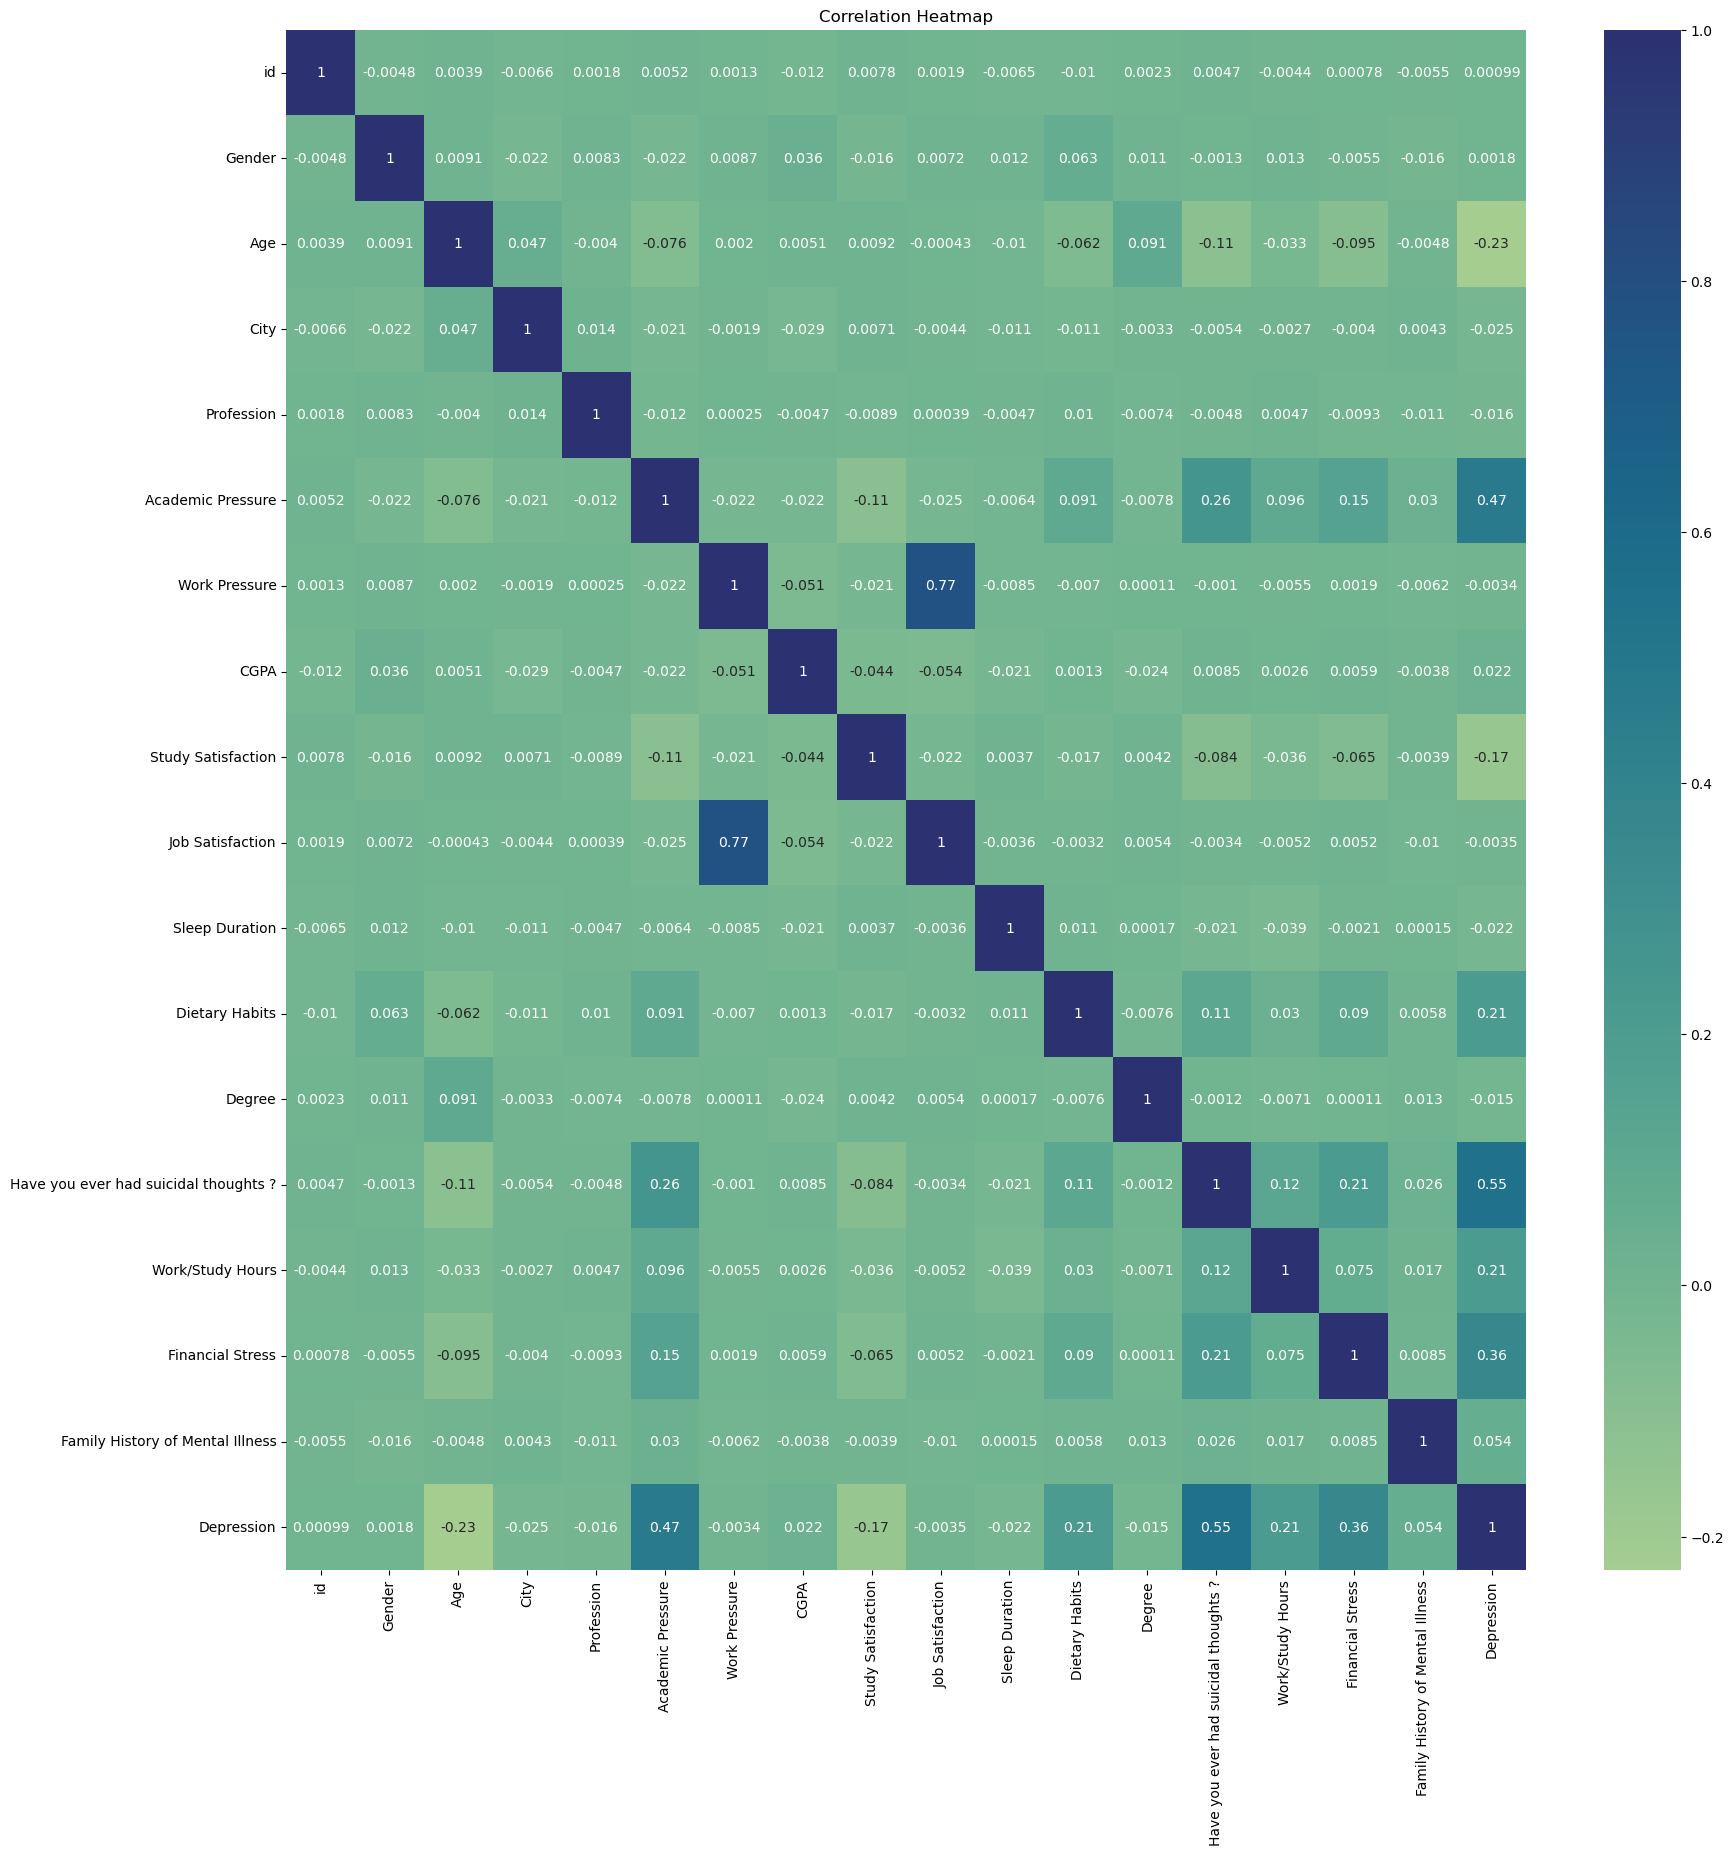

In [28]:
#heat map
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='crest')
plt.title('Correlation Heatmap')
plt.show()


In [29]:
correlation_matrix = df.corr()
target_correlation = correlation_matrix['Depression']
print(target_correlation)


id                                       0.000986
Gender                                   0.001819
Age                                     -0.226511
City                                    -0.024878
Profession                              -0.016437
Academic Pressure                        0.474793
Work Pressure                           -0.003351
CGPA                                     0.022268
Study Satisfaction                      -0.168010
Job Satisfaction                        -0.003483
Sleep Duration                          -0.022412
Dietary Habits                           0.206673
Degree                                  -0.015011
Have you ever had suicidal thoughts ?    0.546290
Work/Study Hours                         0.208627
Financial Stress                         0.363591
Family History of Mental Illness         0.053554
Depression                               1.000000
Name: Depression, dtype: float64


In [30]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [31]:
df.drop(['id','Job Satisfaction'],axis=1,inplace=True)
df

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,1.463201,1.510523,0.025562,1.345456,-0.009777,0.893354,-0.693539,-1.421814,-1.182432,-1.094017,1,-1.121115,-1.488788,0,1
1,0,-0.371450,-1.424206,0.025562,-0.826195,-0.009777,-1.194113,1.510565,-1.421814,-0.375754,-0.126579,0,-1.121115,-0.793050,1,0
2,1,1.055501,1.082541,0.025562,-0.102311,-0.009777,-0.425762,1.510565,0.459507,-1.182432,-0.817606,0,0.497212,-1.488788,1,0
3,0,0.443950,1.388242,0.025562,-0.102311,-0.009777,-1.404899,-0.693539,-0.481154,-0.375754,-0.541195,1,-0.851394,1.294167,1,1
4,0,-0.167600,-0.629384,0.025562,0.621573,-0.009777,0.322191,0.041162,-1.421814,-0.375754,0.840860,1,-1.660558,-1.488788,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0,0.240100,1.143682,0.025562,1.345456,-0.009777,-1.296106,1.510565,-1.421814,1.237602,0.011627,1,-0.042230,-1.488788,1,0
27897,1,0.240100,-0.079122,0.025562,-0.826195,-0.009777,1.185735,0.041162,0.459507,-1.182432,1.946503,0,-1.930279,-0.097311,1,0
27898,1,1.055501,-1.057365,0.025562,-0.102311,-0.009777,-0.711343,0.775863,-1.421814,1.237602,1.531887,0,1.306376,-0.793050,0,0
27899,0,-1.594552,-0.079122,0.025562,1.345456,-0.009777,-0.527755,-0.693539,0.459507,-1.182432,0.011627,1,0.766933,1.294167,0,1


In [32]:
df.columns

Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

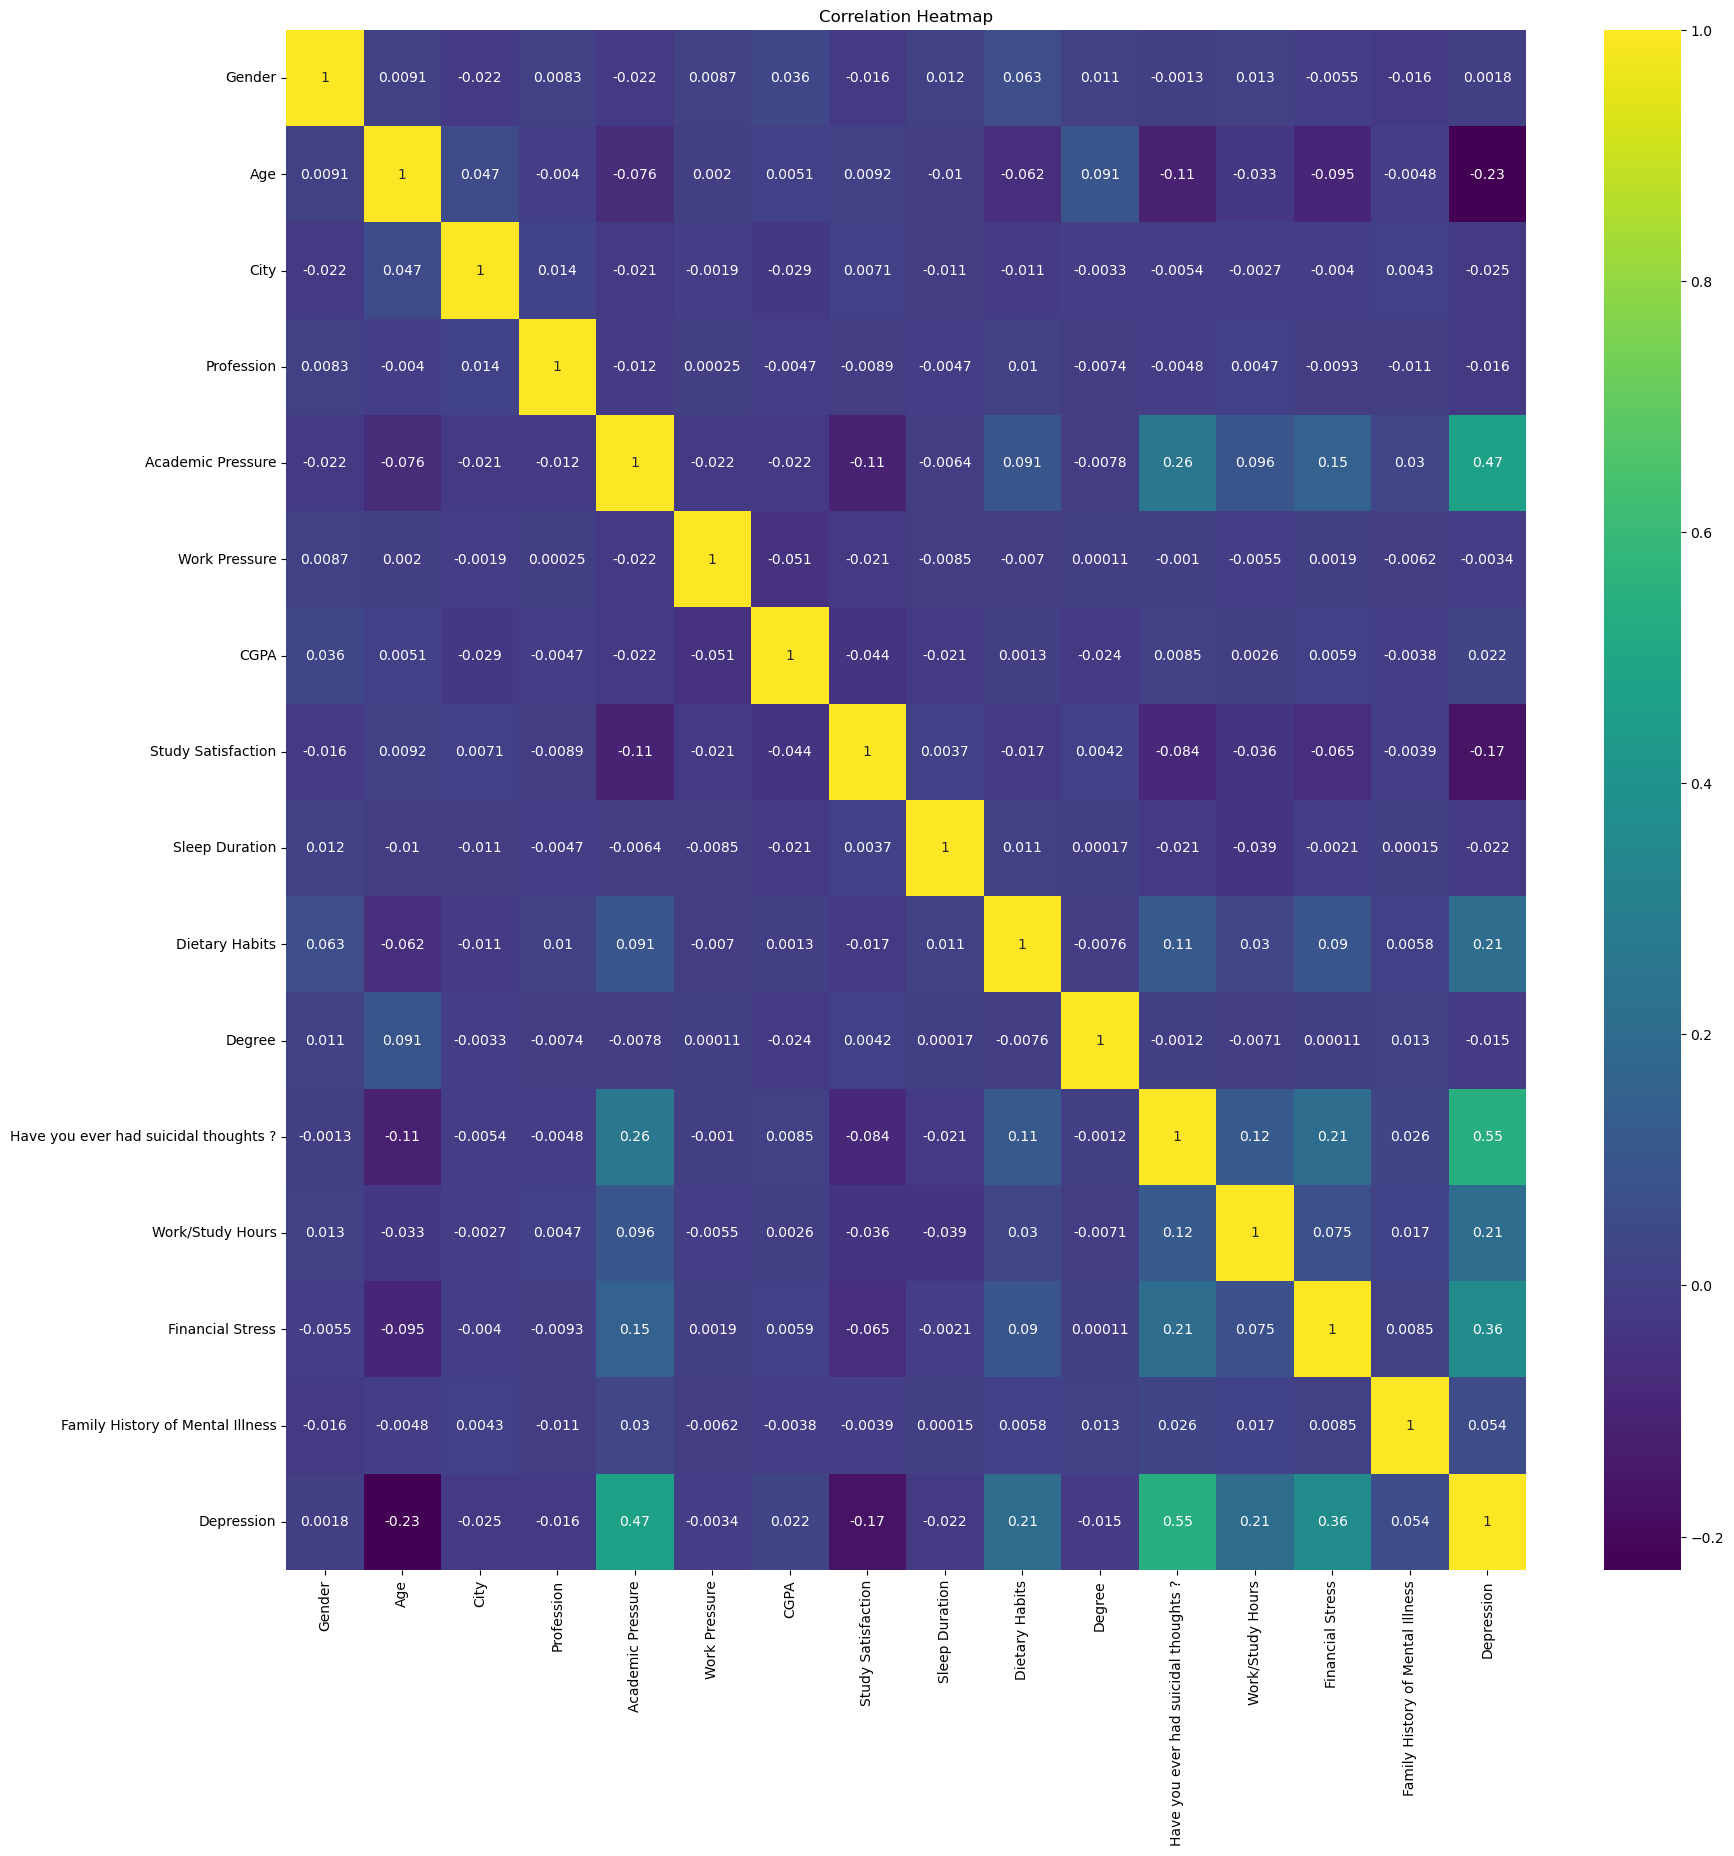

In [33]:
#heat map
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

In [34]:
def calculate_outlier_percentage(df):
    outlier_data = []

    for column in df.select_dtypes(include=[np.number]): 
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_percentage = (len(outliers) / len(df)) * 100

        outlier_data.append([column, round(outlier_percentage, 2)])

    return pd.DataFrame(outlier_data, columns=['Feature', 'Outlier Percentage'])

outlier_df = calculate_outlier_percentage(df)
print(outlier_df)

                                  Feature  Outlier Percentage
0                                  Gender                0.00
1                                     Age                0.04
2                                    City                0.00
3                              Profession                0.11
4                       Academic Pressure                0.00
5                           Work Pressure                0.01
6                                    CGPA                0.03
7                      Study Satisfaction                0.00
8                          Sleep Duration                0.06
9                          Dietary Habits                0.00
10                                 Degree                0.00
11  Have you ever had suicidal thoughts ?                0.00
12                       Work/Study Hours                0.00
13                       Financial Stress                0.00
14       Family History of Mental Illness                0.00
15      

In [35]:
df["Depression"].value_counts(normalize=True) * 100


Depression
1    58.552584
0    41.447416
Name: proportion, dtype: float64

In [36]:
X = df.drop(columns=['Depression'])  
y = df['Depression'] 

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [122]:
from imblearn.combine import SMOTEENN
X= df.drop(['Depression'], axis = 1)
y= df['Depression']

smote_enn = SMOTEENN(random_state = 42, n_jobs = -1)
X_smote, y_smote = smote_enn.fit_resample(X,y)

print(f'Resampled dataset shape: {y_smote.value_counts(normalize = True)}')

data_2 = pd.concat([X_smote, y_smote],axis=1)

c:\Users\arwah\anaconda3\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Resampled dataset shape: Depression
0    0.516838
1    0.483162
Name: proportion, dtype: float64


In [123]:
X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote,test_size=0.30,random_state=1)

Complete LogisticRegression Training ! 0.966567001902691
Complete LogisticRegression Test! 0.9694039315155358
Accuracy: 0.9694
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      3340
           1       0.96      0.97      0.97      2968

    accuracy                           0.97      6308
   macro avg       0.97      0.97      0.97      6308
weighted avg       0.97      0.97      0.97      6308



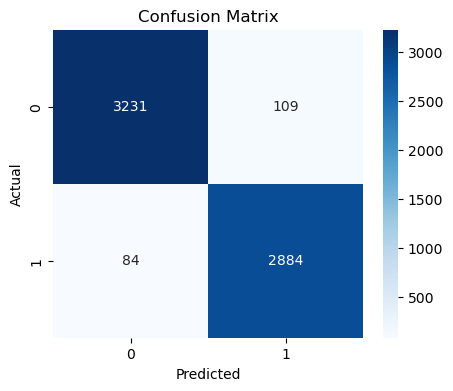

In [124]:
#first model "LogisticRegression" without any improvement    veryyyyy gooooood
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=10)  

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

model = LogisticRegression(C=7, solver='liblinear')
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
Tr_score=model.score(X_train_selected,y_train)
Tst_score=model.score(X_test_selected,y_test)

print("Complete LogisticRegression Training !",Tr_score)
print("Complete LogisticRegression Test!",Tst_score)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", class_report)


plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



Complete LogisticRegression Training ! 0.9662272356618646
Complete LogisticRegression Test! 0.9686112872542803
Accuracy: 0.9686
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      3340
           1       0.96      0.97      0.97      2968

    accuracy                           0.97      6308
   macro avg       0.97      0.97      0.97      6308
weighted avg       0.97      0.97      0.97      6308



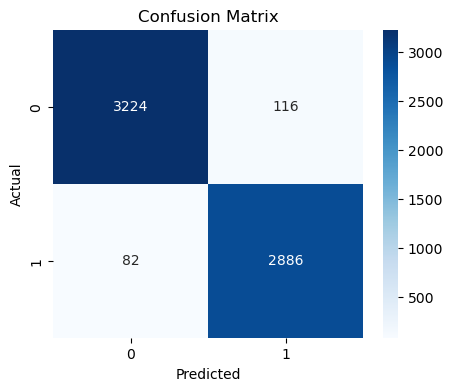

In [126]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1, interaction_only=True)  
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LogisticRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
Tr_score=model.score(X_train_poly,y_train)
Tst_score=model.score(X_test_poly,y_test)

print("Complete LogisticRegression Training !",Tr_score)
print("Complete LogisticRegression Test!",Tst_score)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", class_report)


plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Complete LogisticRegression Training ! 0.9661592824136994
Complete LogisticRegression Test! 0.9684527584020292
Accuracy: 0.9685
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      3340
           1       0.96      0.97      0.97      2968

    accuracy                           0.97      6308
   macro avg       0.97      0.97      0.97      6308
weighted avg       0.97      0.97      0.97      6308



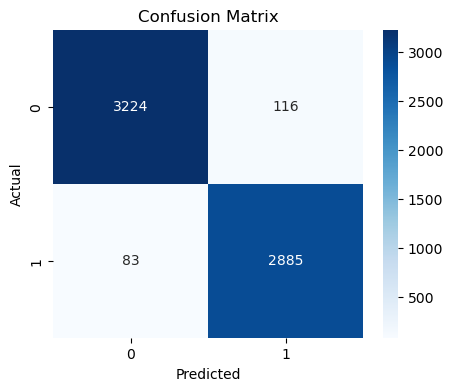

In [127]:
from imblearn.over_sampling import SMOTE


model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
Tr_score=model.score(X_train,y_train)
Tst_score=model.score(X_test,y_test)

print("Complete LogisticRegression Training !",Tr_score)
print("Complete LogisticRegression Test!",Tst_score)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", class_report)


plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [110]:
# from imblearn.over_sampling import SMOTE
# from sklearn.decomposition import PCA
# from sklearn.linear_model import LogisticRegression


# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# pca = PCA(n_components=15) 
# X_train_pca = pca.fit_transform(X_train_balanced)
# X_test_pca = pca.transform(X_test)

# model = LogisticRegression()
# model.fit(X_train_pca, y_train_balanced)


# y_pred = model.predict(X_test_pca)

# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# class_report = classification_report(y_test, y_pred)
# Tr_score=model.score(X_train_pca,y_train_balanced)
# Tst_score=model.score(X_test_pca,y_test)

# print("Complete LogisticRegression Training !",Tr_score)
# print("Complete LogisticRegression Test!",Tst_score)

# print(f"Accuracy: {accuracy:.4f}")
# print("Classification Report:\n", class_report)


# plt.figure(figsize=(5, 4))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix")
# plt.show()


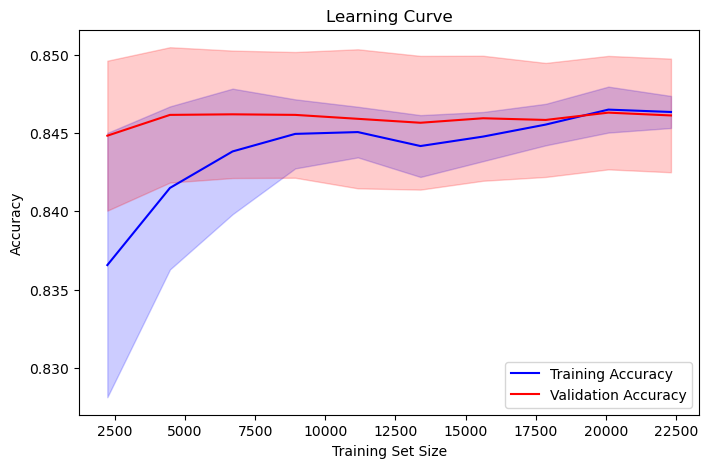

In [128]:
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(), 
                                                        X, y, cv=5, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), 
                                                        scoring="accuracy")


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")

plt.plot(train_sizes, test_mean, label="Validation Accuracy", color="red")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="red")

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()


In [112]:
# #first model "LogisticRegression" with Smote and Class Weigh

# # smote to increase number of smaller data
# sm = SMOTE(random_state=1)
# Xtrain_res, y_train_res = sm.fit_resample(X_train, y_train)


# model= LogisticRegression(class_weight='balanced', random_state=1)
# model.fit(Xtrain_res, y_train_res)

# # Logistic Regression
# # model = LogisticRegression()
# # model.fit(Xtrain_res, y_train_res)

# # logisticRegression
# logR_predict = model.predict(X_test)

# # accuracy
# Tr_score = model.score(Xtrain_res, y_train_res)
# Tst_score = model.score(X_test, y_test)

# print("Complete LogisticRegression Training Accuracy:", Tr_score)
# print("Complete LogisticRegression Test Accuracy:", Tst_score)
# print("Confusion Matrix:\n", confusion_matrix(y_test, logR_predict))
# print("\nClassification Report:\n", classification_report(y_test, logR_predict))

# plt.figure(figsize=(5, 4))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix")
# plt.show()

                                  Feature  Importance
7   Have you ever had suicidal thoughts ?    5.642056
2                       Academic Pressure    2.627702
9                        Financial Stress    1.852638
1                                     Age    1.214252
8                        Work/Study Hours    1.059415
6                          Dietary Habits    0.955969
4                      Study Satisfaction    0.902294
10       Family History of Mental Illness    0.622863
0                                  Gender    0.235822
3                                    CGPA    0.149834
5                          Sleep Duration    0.142798


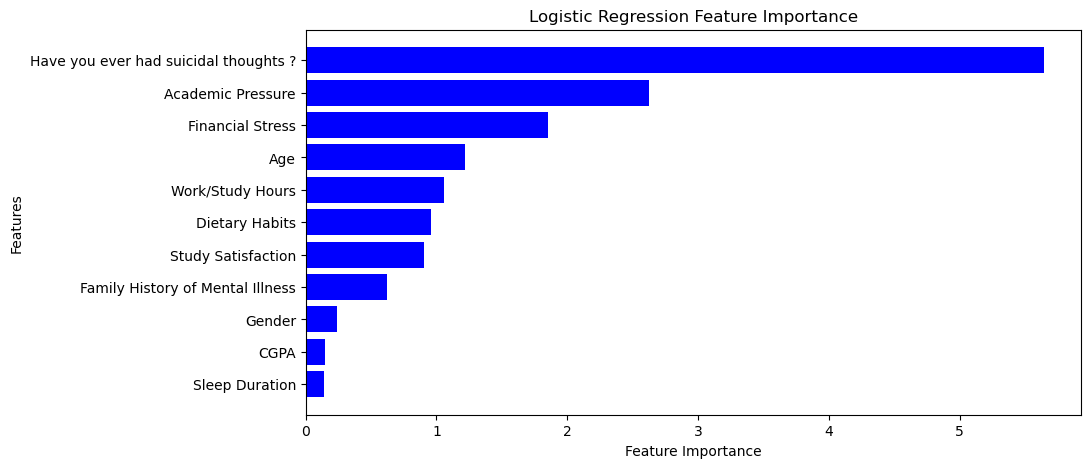

In [129]:
feature_importance = np.abs(model.coef_[0])  
feature_names = X_train.columns  

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


plt.figure(figsize=(10, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Logistic Regression Feature Importance")
plt.gca().invert_yaxis()  
plt.show()



In [114]:
# # Feature Importance
# importances = np.abs(model.coef_)[0]  
# low_importance_features = X_train.columns[importances < 0.01]
# print("Features to drop:", list(low_importance_features))




In [115]:
# df.drop(['City', 'Degree'],axis=1,inplace=True)


In [116]:
# df.columns

In [130]:
#second model XGB without any improvements


model2 = XGBClassifier(scale_pos_weight=1.5, 
                       max_depth=4,  
                       learning_rate=0.05,  
                       n_estimators=300,  
                       subsample=0.8,  
                       colsample_bytree=0.8,
                       gamma=2,
                       random_state=42) 
model2.fit(X_train, y_train)
train_accuracy = accuracy_score(y_train, model2.predict(X_train))
test_accuracy = accuracy_score(y_test, model2.predict(X_test))

# accuracy
y_pred_xgb = model2.predict(X_test)

print("XGB Training Accuracy:", train_accuracy)
print("XGB Test Accuracy:", test_accuracy)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGB Training Accuracy: 0.9833514541995108
XGB Test Accuracy: 0.9774889029803424
XGBoost Accuracy: 0.9774889029803424
Confusion Matrix:
 [[3243   97]
 [  45 2923]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      3340
           1       0.97      0.98      0.98      2968

    accuracy                           0.98      6308
   macro avg       0.98      0.98      0.98      6308
weighted avg       0.98      0.98      0.98      6308



In [118]:
# import pandas as pd

# # تحويل X_train و X_test إلى DataFrame إذا لزم الأمر
# if isinstance(X_train, np.ndarray):
#     X_train = pd.DataFrame(X_train)

# if isinstance(X_test, np.ndarray):
#     X_test = pd.DataFrame(X_test)

# neg, pos = np.bincount(y_train)
# scale_pos_weight = neg / pos  


# model2 = XGBClassifier(
#     n_estimators=700,
#     scale_pos_weight = neg / pos, 
#     # scale_pos_weight=15,  
#     max_depth=3,  
#     learning_rate=0.07,    
#     random_state=42,
#     reg_lambda=10, 
#     reg_alpha=6,
#     subsample=1, 
#     colsample_bytree=0.9,
#     eval_metric="logloss"
# )    

# # تدريب النموذج
# model2.fit(X_train, y_train)

# # استخراج أهمية الميزات
# importances = model2.feature_importances_

# # تحديد الميزات المهمة فقط
# important_features = X_train.columns[importances > 0.005]  
# X_train_selected = X_train[important_features]
# X_test_selected = X_test[important_features]

# # إعادة تدريب النموذج على الميزات المهمة فقط
# model2.fit(X_train_selected, y_train)

# # ✅ استخدم الميزات المحددة عند التنبؤ
# y_pred = model2.predict(X_test_selected)

# # حساب الدقة والتقارير
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# class_report = classification_report(y_test, y_pred)

# test_accuracy = accuracy_score(y_test, model2.predict(X_test_selected))
# train_accuracy = accuracy_score(y_train, model2.predict(X_train_selected))

# print(f"XGBoost Accuracy: {accuracy}")
# print("Confusion Matrix:")
# print(conf_matrix)
# print("Classification Report:")
# print(class_report)
# print("XGBoost Training Accuracy:", train_accuracy)
# print("XGBoost Test Accuracy:", test_accuracy)


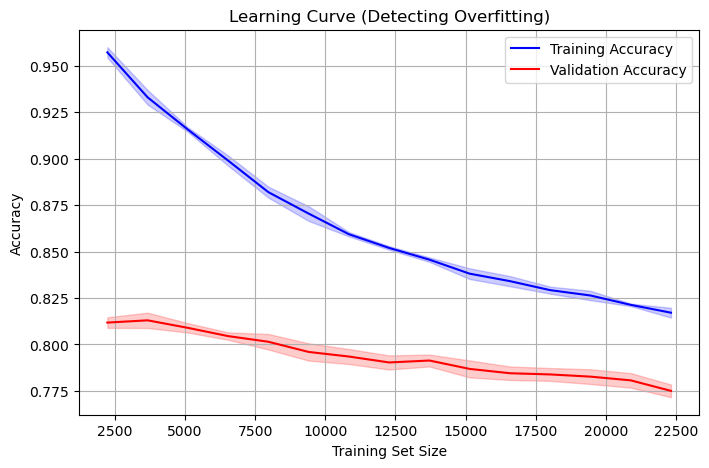

In [131]:
from xgboost import XGBClassifier
from sklearn.model_selection import learning_curve, StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


model2 = XGBClassifier(scale_pos_weight=15, reg_lambda=7, random_state=42)

# حساب learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model2, X, y, cv=cv, train_sizes=np.linspace(0.1, 1.0, 15), scoring="accuracy", n_jobs=-1
)

# حساب المتوسط والانحراف المعياري
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# رسم المنحنى
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")

plt.plot(train_sizes, test_mean, label="Validation Accuracy", color="red")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="red")

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Detecting Overfitting)")
plt.legend()
plt.grid(True)
plt.show()



In [121]:
# #second model XGB with grid parameters & smote & alot of improvements
# from sklearn.model_selection import RandomizedSearchCV

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# param_dist = {
#     'n_estimators': [100],
#     'max_depth': [1,2],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'gamma': [0, 0.1, 0.2, 0.3],  
#     'subsample': [0.9, 0.8, 1],  
#     'colsample_bytree': [0.7, 0.8],  
#     'min_child_weight': [1, 2, 3],  
#     'scale_pos_weight': [1, len(y_train[y_train == 0]) / len(y_train[y_train == 1])]
# }

# xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# random_search = RandomizedSearchCV(xgb, param_dist, cv=5, scoring='accuracy', n_jobs=-1, n_iter=10, random_state=42)
# random_search.fit(X_train_resampled, y_train_resampled)

# # أفضل معلمات
# best_xgb = random_search.best_estimator_

# # التقييم على مجموعة الاختبار
# y_pred = best_xgb.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# class_report = classification_report(y_test, y_pred)

# # print("XGB Training Accuracy:", train_accuracy)
# # print("XGB Test Accuracy:", test_accuracy)
# print(f"XGBoost Accuracy: {accuracy}")
# print("Confusion Matrix:")
# print(conf_matrix)
# print("Classification Report:")
# print(class_report)


In [133]:
# import matplotlib.pyplot as plt
# import xgboost as xgb

# # الحصول على أهمية الميزات
# feature_importance = model2.feature_importances_

# # ترتيب الميزات حسب الأهمية
# sorted_idx = feature_importance.argsort()
# plt.figure(figsize=(10, 6))
# plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
# plt.yticks(range(len(sorted_idx)), [X_train.columns[i] for i in sorted_idx])
# plt.xlabel("Feature Importance")
# plt.ylabel("Features")
# plt.title("XGBoost Feature Importance")
# plt.show()


In [134]:
# # استخراج أهمية الميزات من نموذج XGBoost
# importances = best_xgb.feature_importances_

# # إنشاء DataFrame لعرض الميزات وأهميتها
# feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# # تحديد الميزات ذات الأهمية المنخفضة جدًا
# low_importance_features = feature_importance_df[feature_importance_df["Importance"] < 0.01]["Feature"].tolist()

# print(f"Features to drop: {low_importance_features}")


In [135]:
# df.drop(['Work Pressure'],axis=1,inplace=True)


In [136]:
#third model Balanced Random Forest Classifier without improvements

model3= BalancedRandomForestClassifier(n_estimators=500,max_depth=7,class_weight='balanced_subsample',min_samples_split=15, min_samples_leaf=6,random_state=42)
model3.fit(X_train, y_train)
y_pred_rf = model3.predict(X_test)
print("Balanced Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Balanced Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print(f"rf Accuracy: {accuracy}")
print("rf Training Accuracy:", train_accuracy)
print("rf Test Accuracy:", test_accuracy)


c:\Users\arwah\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\arwah\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\arwah\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Balanced Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3340
           1       0.96      0.98      0.97      2968

    accuracy                           0.97      6308
   macro avg       0.97      0.97      0.97      6308
weighted avg       0.97      0.97      0.97      6308

Balanced Random Forest Confusion Matrix:
[[3204  136]
 [  70 2898]]
rf Accuracy: 0.9684527584020292
rf Training Accuracy: 0.9833514541995108
rf Test Accuracy: 0.9774889029803424


In [ ]:
# model3= BalancedRandomForestClassifier()


# train_sizes, train_scores, test_scores = learning_curve(
#     model3, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring="accuracy"
# )


# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)
# test_mean = np.mean(test_scores, axis=1)
# test_std = np.std(test_scores, axis=1)


# plt.figure(figsize=(8, 5))
# plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")

# plt.plot(train_sizes, test_mean, label="Validation Accuracy", color="red")
# plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="red")

# plt.xlabel("Training Set Size")
# plt.ylabel("Accuracy")
# plt.title("Learning Curve (Detecting Overfitting)")
# plt.legend()
# plt.show()

In [ ]:

# importances = model3.feature_importances_
# indices = np.argsort(importances)[::-1]

# plt.figure(figsize=(12, 6))
# plt.title("Feature Importance - Balanced Random Forest")
# plt.bar(range(X_train.shape[1]), importances[indices], align="center")
# plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
# plt.xlabel("Features")
# plt.ylabel("Importance Score")
# plt.show()


In [ ]:
# model3= BalancedRandomForestClassifier()


# train_sizes, train_scores, test_scores = learning_curve(
#     model3, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring="accuracy"
# )


# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)
# test_mean = np.mean(test_scores, axis=1)
# test_std = np.std(test_scores, axis=1)


# plt.figure(figsize=(8, 5))
# plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")

# plt.plot(train_sizes, test_mean, label="Validation Accuracy", color="red")
# plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="red")

# plt.xlabel("Training Set Size")
# plt.ylabel("Accuracy")
# plt.title("Learning Curve (Detecting Overfitting)")
# plt.legend()
# plt.show()

In [ ]:


# X = df.drop('diabetes', axis=1)
# y = df['diabetes']


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# adasyn = ADASYN(sampling_strategy=1.0, random_state=42)  # زيادة العينات بمعدل متوازن
# X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)
# rf = BalancedRandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
# rf.fit(X_train_resampled, y_train_resampled)


# y_pred_rf = rf.predict(X_test)
# print("Balanced Random Forest Classification Report:")
# print(classification_report(y_test, y_pred_rf))
# print("Balanced Random Forest Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred_rf))
# print(f"rf Accuracy: {accuracy}")
# print("rf Training Accuracy:", train_accuracy)
# print("rf Test Accuracy:", test_accuracy)




In [ ]:

rus = RandomUnderSampler(random_state=1)
Xtrain_res, Ytrain_res = rus.fit_resample(X_train, y_train)


rf = RandomForestClassifier(
    class_weight={0: 1, 1: 1.5}, 
    random_state=1, 
    n_estimators=50,  
    max_depth=3,   
    min_samples_split=4,  
    min_samples_leaf=2  
)
rf.fit(Xtrain_res, Ytrain_res)
rf_predict = rf.predict(X_test)


rf_train_acc = rf.score(Xtrain_res, Ytrain_res)
rf_test_acc = accuracy_score(y_test, rf_predict)


print("Random Forest Training Accuracy:", rf_train_acc)
print("Random Forest Test Accuracy:", rf_test_acc)
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predict))
print("Classification Report:\n", classification_report(y_test, rf_predict))
print(f"rf Accuracy: {accuracy}")




In [137]:
from lightgbm import LGBMClassifier
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
lgb_model = LGBMClassifier(
    num_leaves=31,  
    min_child_samples=45,  
    learning_rate=0.02,  
    n_estimators=800,  
    colsample_bytree=0.8,  
    subsample=0.75,  
    bagging_fraction=0.7,  
    bagging_freq=5,  
    min_child_weight=4,
    lambda_l1=1,  
    max_bin=255,
    scale_pos_weight=scale_pos_weight,  
    random_state=42
)


lgb_model.fit(X_train, y_train)
lgb_predict = lgb_model.predict(X_test)


lgb_test_acc = accuracy_score(y_test, lgb_predict)
lgb_cv_mean = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring='accuracy').mean()


print(f"GBM Accuracy: {accuracy}")
print("Confusion Matrix:\n", confusion_matrix(y_test, lgb_predict))
print(f"LightGBM CV Mean Accuracy: {lgb_cv_mean:.4f}")
print("Classification Report:\n", classification_report(y_test, lgb_predict))
print("GBM Training Accuracy:", train_accuracy)
print(f"LightGBM Test Accuracy: {lgb_test_acc:.4f}")




GBM Accuracy: 0.9684527584020292
Confusion Matrix:
 [[3265   75]
 [  63 2905]]
LightGBM CV Mean Accuracy: 0.9781
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3340
           1       0.97      0.98      0.98      2968

    accuracy                           0.98      6308
   macro avg       0.98      0.98      0.98      6308
weighted avg       0.98      0.98      0.98      6308

GBM Training Accuracy: 0.9833514541995108
LightGBM Test Accuracy: 0.9781


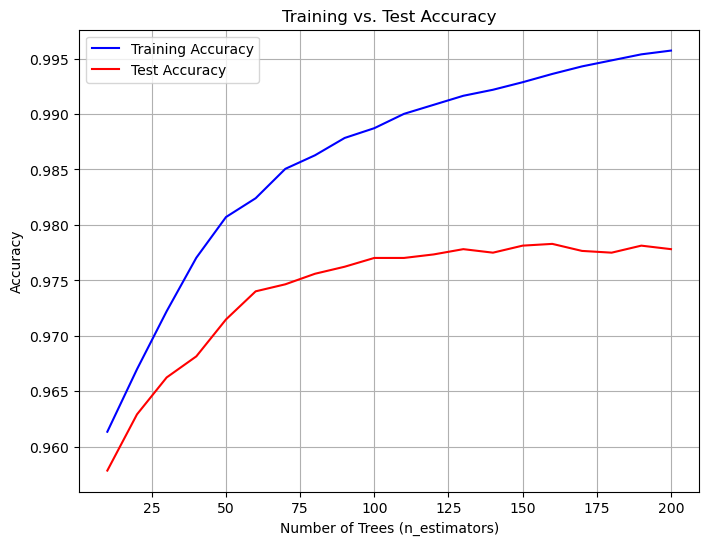

In [138]:
n_estimators = np.arange(10, 210, 10)
train_accuracies = []
test_accuracies = []
for n in n_estimators:
    model = lgb.LGBMClassifier(n_estimators=n, class_weight='balanced', random_state=1, max_depth=5,reg_alpha=0.1,     # L1 Regularization
    reg_lambda=0.1)
    model.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)


plt.figure(figsize=(8, 6))
plt.plot(n_estimators, train_accuracies, label="Training Accuracy", color="blue")
plt.plot(n_estimators, test_accuracies, label="Test Accuracy", color="red")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Training vs. Test Accuracy")
plt.legend()
plt.grid(True)
plt.show()


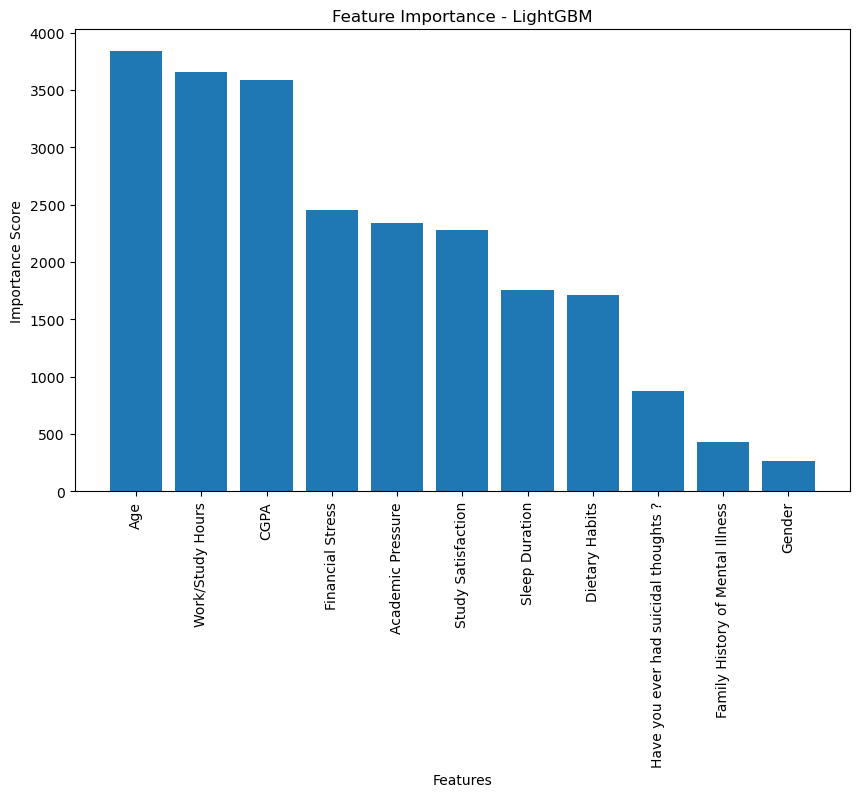

In [139]:
import matplotlib.pyplot as plt
import numpy as np

# استخراج الأهمية
importance = lgb_model.feature_importances_
features = X_train.columns

# ترتيب الأهمية تنازليًا
indices = np.argsort(importance)[::-1]

# رسم الأهمية
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - LightGBM")
plt.bar(range(len(features)), importance[indices], align="center")
plt.xticks(range(len(features)), features[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

In [140]:
# df.drop(["Profession"],axis=1,inplace=True)

In [ ]:
# import pandas as pd
# import numpy as np
# import lightgbm as lgb
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve
# from imblearn.over_sampling import SMOTE

# # 🔹 تحميل البيانات
# m = df.drop('diabetes', axis=1)
# n = df['diabetes']

# # 🔹 تقسيم البيانات إلى تدريب واختبار
# Xtrain, Xtest, Ytrain, Ytest = train_test_split(m, n, test_size=0.30, random_state=1)

# # 🔹 تطبيق SMOTE لموازنة الفئات
# sm = SMOTE(random_state=1)
# Xtrain_res, Ytrain_res = sm.fit_resample(Xtrain, Ytrain)

# # 🔹 ضبط scale_pos_weight لحل مشكلة عدم التوازن
# scale_pos_weight = len(Ytrain[Ytrain == 0]) / len(Ytrain[Ytrain == 1])

# # 🔹 إنشاء نموذج LightGBM مع المعلمات المحسنة
# lgb_model = lgb.LGBMClassifier(
#     scale_pos_weight=scale_pos_weight,  # موازنة الفئات
#     random_state=1,
#     n_estimators=200,  # عدد الأشجار
#     max_depth=7,  # تقليل التعقيد
#     learning_rate=0.05,  # معدل التعلم
#     num_leaves=31,  # تعديل عدد الأوراق
#     min_child_samples=50  # الحد الأدنى من العينات لكل ورقة
# )

# # 🔹 تدريب النموذج
# lgb_model.fit(Xtrain_res, Ytrain_res)

# # 🔹 التنبؤ باحتمالات الفئة 1
# y_probs = lgb_model.predict_proba(Xtest)[:, 1]

# # 🔹 تحديد العتبة المثلى باستخدام AUC-ROC
# fpr, tpr, thresholds = roc_curve(Ytest, y_probs)
# optimal_idx = np.argmax(tpr - fpr)  # إيجاد أفضل نقطة توازن
# optimal_threshold = thresholds[optimal_idx]

# print(f"🔹 Optimal Threshold Found: {optimal_threshold:.3f}")

# # 🔹 ضبط التنبؤات باستخدام العتبة المثلى
# y_preds_adjusted = (y_probs >= optimal_threshold).astype(int)

# # 🔹 حساب مقاييس التقييم
# accuracy = accuracy_score(Ytest, y_preds_adjusted)
# precision = precision_score(Ytest, y_preds_adjusted)
# recall = recall_score(Ytest, y_preds_adjusted)
# f1 = f1_score(Ytest, y_preds_adjusted)

# # 🔹 طباعة النتائج
# print("\n🔹 LightGBM Performance with Optimized Threshold 🔹")
# print(f"Test Accuracy: {accuracy:.4f}")
# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1-Score: {f1:.4f}")
# print("Confusion Matrix:\n", confusion_matrix(Ytest, y_preds_adjusted))
# train_accuracy = accuracy_score(Ytrain_res, lgb_model.predict(Xtrain_res))

# # حساب دقة الاختبار
# test_accuracy = accuracy_score(Ytest, lgb_model.predict(Xtest))

# print(f"Training Accuracy: {train_accuracy:.4f}")
# print(f"Test Accuracy: {test_accuracy:.4f}")

# # 🔹 حساب Cross-validation
# lgb_cv_scores = cross_val_score(lgb_model, Xtrain_res, Ytrain_res, cv=5, scoring='accuracy')
# print("\n🔹 LightGBM Cross-validation scores:", lgb_cv_scores)
# print("أفضل نموذج LightGBM Classification Report:\n", classification_report(Ytest,y_preds_adjusted))
# # 🔹 رسم النتائج
# plt.figure(figsize=(12, 6))

# # 🔹 رسم منحنى AUC-ROC
# plt.subplot(1, 2, 1)
# plt.plot(fpr, tpr, label=f'AUC-ROC Curve')
# plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label='Optimal Threshold', zorder=3)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('AUC-ROC Curve')
# plt.legend()

# # 🔹 رسم دقة الاختبار بعد ضبط العتبة
# plt.subplot(1, 2, 2)
# plt.bar(['LightGBM'], [accuracy])
# plt.ylabel('Test Accuracy')
# plt.title('Model Accuracy after Optimization')

# plt.tight_layout()
# plt.show()


In [141]:
#first try 
gbm = GradientBoostingClassifier(random_state=1)
gbm.fit(X_train, y_train)
gbm_predict = gbm.predict(X_test)
print("Gradient Boosting Test Accuracy:", accuracy_score(y_test, gbm_predict))
gbm_train_acc = accuracy_score(y_train, gbm.predict(X_train))
gbm_test_acc = accuracy_score(y_test, gbm_predict)

# طباعة النتائج
print(f"Gradient Boosting Training Accuracy: {gbm_train_acc:.4f}")
print(f"Gradient Boosting Test Accuracy: {gbm_test_acc:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, gbm_predict))
print("Classification Report:\n", classification_report(y_test, gbm_predict))

Gradient Boosting Test Accuracy: 0.9743183259353202
Gradient Boosting Training Accuracy: 0.9781
Gradient Boosting Test Accuracy: 0.9743
Confusion Matrix:
 [[3242   98]
 [  64 2904]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      3340
           1       0.97      0.98      0.97      2968

    accuracy                           0.97      6308
   macro avg       0.97      0.97      0.97      6308
weighted avg       0.97      0.97      0.97      6308



In [142]:
df.columns

Index(['Gender', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [143]:
# gbm = GradientBoostingClassifier( learning_rate=0.03, 
#     n_estimators=600,  
#     max_depth=4,  
#     min_samples_split=10,  
#     min_samples_leaf=5,  
#     subsample=0.85,  
#     random_state=1)

# gbm.fit(X_train, y_train)

# gbm_predict = gbm.predict(X_test)

# print("Gradient Boosting Test Accuracy:", accuracy_score(y_test, gbm_predict))
# gbm_train_acc = accuracy_score(y_train, gbm.predict(X_train))
# gbm_test_acc = accuracy_score(y_test, gbm_predict)


# print(f"Gradient Boosting Training Accuracy: {gbm_train_acc:.4f}")
# print(f"Gradient Boosting Test Accuracy: {gbm_test_acc:.4f}")
# print("Confusion Matrix:\n", confusion_matrix(y_test, gbm_predict))
# print("Classification Report:\n", classification_report(y_test, gbm_predict))

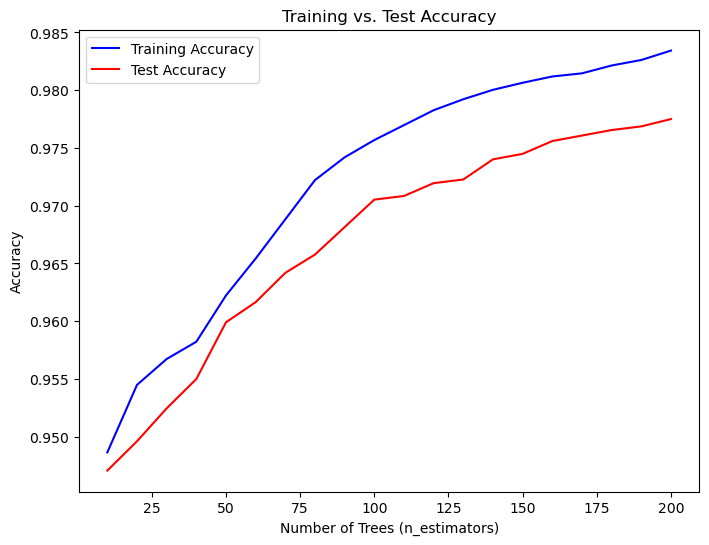

In [144]:
n_estimators_range = np.arange(10, 210, 10)

train_acc = []
test_acc = []

for n in n_estimators_range:
    gbm = GradientBoostingClassifier(n_estimators=n, learning_rate=0.05, max_depth=4, random_state=1)
    gbm.fit(X_train, y_train)
    
    train_acc.append(accuracy_score(y_train, gbm.predict(X_train)))  # تدريب
    test_acc.append(accuracy_score(y_test, gbm.predict(X_test)))  # اختبار


plt.figure(figsize=(8, 6))
plt.plot(n_estimators_range, train_acc, label="Training Accuracy", color='blue')
plt.plot(n_estimators_range, test_acc, label="Test Accuracy", color='red')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Training vs. Test Accuracy")
plt.legend()
plt.show()


In [146]:
# importance = gbm.feature_importances_
# features = X_train.columns


# indices = np.argsort(importance)[::-1]


# plt.figure(figsize=(10, 6))
# plt.title("Feature Importance - Gradient Boosting")
# plt.bar(range(len(features)), importance[indices], align="center")
# plt.xticks(range(len(features)), features[indices], rotation=90)
# plt.xlabel("Features")
# plt.ylabel("Importance Score")
# plt.show()


In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# from imblearn.over_sampling import SMOTE
# import pandas as pd

# # تقسيم البيانات
# X = df.drop('diabetes', axis=1)
# y = df['diabetes']

# # تقسيم البيانات إلى تدريب واختبار
# Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=1)

# # تطبيق SMOTE لزيادة بيانات الفئة الأقل
# smote = SMOTE(random_state=1)
# Xtrain_res, Ytrain_res = smote.fit_resample(Xtrain, Ytrain)

# # 1️⃣ نموذج Gradient Boosting مع تحسين المعلمات
# gbm = GradientBoostingClassifier(random_state=1)

# # تحديد معلمات الشبكة لتحسينها باستخدام GridSearchCV
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7]
# }

# grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
# grid_search.fit(Xtrain_res, Ytrain_res)

# # أفضل معلمات
# best_params = grid_search.best_params_
# print("أفضل معلمات Gradient Boosting:", best_params)

# # تدريب النموذج باستخدام أفضل المعلمات
# best_gbm = grid_search.best_estimator_
# best_gbm.fit(Xtrain_res, Ytrain_res)

# # التنبؤ على بيانات الاختبار
# gbm_predict = best_gbm.predict(Xtest)

# # حساب الدقة والمقاييس الأخرى
# gbm_test_acc = accuracy_score(Ytest, gbm_predict)
# gbm_precision = precision_score(Ytest, gbm_predict)
# gbm_recall = recall_score(Ytest, gbm_predict)
# gbm_f1 = f1_score(Ytest, gbm_predict)
# conf_matrix = confusion_matrix(Ytest, gbm_predict)

# # طباعة النتائج
# print("Gradient Boosting Test Accuracy:", gbm_test_acc)
# print("Precision:", gbm_precision)
# print("Recall:", gbm_recall)
# print("F1-Score:", gbm_f1)
# print("Confusion Matrix:\n", conf_matrix)
# print("Classification Report:\n", classification_report(y_test, y_pred))


In [147]:
model = SVC()  

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("SVM Training Accuracy:", train_accuracy)
print("SVM Test Accuracy:", test_accuracy)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
accuracy = accuracy_score(y_test, y_pred)
accuracy

SVM Training Accuracy: 0.9770997553683066
SVM Test Accuracy: 0.9741597970830691

Confusion Matrix:
 [[3242   98]
 [  65 2903]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      3340
           1       0.97      0.98      0.97      2968

    accuracy                           0.97      6308
   macro avg       0.97      0.97      0.97      6308
weighted avg       0.97      0.97      0.97      6308



0.9684527584020292

In [148]:
# #stop here
# train_sizes = np.linspace(0.1, 1.0, 10)  
# train_acc = []
# test_acc = []


# for size in train_sizes:
#     X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    
#     model = SVC()
#     model.fit(X_train_subset, y_train_subset)

#     train_acc.append(accuracy_score(y_train_subset, model.predict(X_train_subset)))
#     test_acc.append(accuracy_score(y_test, model.predict(X_test)))


# plt.figure(figsize=(8, 6))
# plt.plot(train_sizes, train_acc, label='Training Accuracy', color='blue')
# plt.plot(train_sizes, test_acc, label='Test Accuracy', color='red')
# plt.xlabel('Training Size')
# plt.ylabel('Accuracy')
# plt.title('Overfitting Analysis for SVM')
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
# from sklearn.svm import SVC
# from sklearn.model_selection import RandomizedSearchCV
# from imblearn.over_sampling import SMOTE
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score

# # تقسيم البيانات
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # توحيد البيانات باستخدام StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # تطبيق SMOTE لموازنة البيانات
# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# # تحسين المعلمات باستخدام RandomizedSearchCV لتقليل الوقت
# param_dist = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf'],
#     'gamma': ['scale', 'auto']
# }

# random_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=5, cv=3, n_jobs=-1, verbose=1)
# random_search.fit(X_train_res, y_train_res)

# # أفضل معلمات
# best_params = random_search.best_params_
# print(f"أفضل معلمات SVM: {best_params}")

# # تدريب النموذج باستخدام أفضل المعلمات
# best_svm = random_search.best_estimator_
# best_svm.fit(X_train_res, y_train_res)

# # التنبؤ على بيانات الاختبار
# y_pred = best_svm.predict(X_test_scaled)

# # حساب الدقة
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Test Accuracy: {accuracy:.4f}")


In [ ]:
# from sklearn.svm import SVC
# from imblearn.over_sampling import SMOTE
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split

# # تقسيم البيانات
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # توحيد البيانات باستخدام StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # تطبيق SMOTE لموازنة البيانات
# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# # إنشاء نموذج SVM مباشرة
# svm_model = SVC(kernel='rbf', C=1, gamma='scale')  # اختيارات معقولة بدون تحسين معلمات

# # تدريب النموذج
# svm_model.fit(X_train_res, y_train_res)

# # التنبؤ على بيانات الاختبار
# y_pred = svm_model.predict(X_test_scaled)

# # حساب الدقة
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Test Accuracy: {accuracy:.4f}")


In [153]:
# from sklearn.naive_bayes import GaussianNB
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix

# # تقسيم البيانات
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # إنشاء نموذج Naive Bayes
# nb_model = GaussianNB()

# # تدريب النموذج
# nb_model.fit(X_train, y_train)

# # التنبؤ
# y_pred = nb_model.predict(X_test)

# # حساب الدقة
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Naive Bayes Test Accuracy: {accuracy:.4f}")

# # طباعة مصفوفة التشويش
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [152]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix

# # تقسيم البيانات
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # إنشاء نموذج MLP (Multi-layer Perceptron)
# mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# # تدريب النموذج
# mlp_model.fit(X_train, y_train)

# # التنبؤ
# y_pred = mlp_model.predict(X_test)

# # حساب الدقة
# accuracy = accuracy_score(y_test, y_pred)
# print(f"MLPClassifier Test Accuracy: {accuracy:.4f}")

# # طباعة مصفوفة التشويش
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [151]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from imblearn.over_sampling import SMOTE
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score
# import numpy as np

# # تقسيم البيانات
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # توحيد البيانات باستخدام StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # تطبيق SMOTE لموازنة البيانات
# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# # معلمات بسيطة لـ RandomizedSearchCV
# param_dist = {
#     'hidden_layer_sizes': [(50,), (100,)],  # تقليل الخيارات
#     'activation': ['relu'],  # استخدم تنشيط واحد
#     'solver': ['adam'],  # استخدم خوارزمية واحدة
#     'learning_rate': ['constant'],  # استخدم خيار واحد
#     'max_iter': [1000],  # استخدم عدد التكرارات الثابت
#     'alpha': [0.0001]  # تقليل المعامل المنتظم
# }

# # ضبط المعلمات عشوائيًا
# random_search = RandomizedSearchCV(MLPClassifier(), param_distributions=param_dist, n_iter=3, cv=3, n_jobs=-1, verbose=1, random_state=42)
# random_search.fit(X_train_res, y_train_res)

# # أفضل معلمات
# best_params = random_search.best_params_
# print(f"أفضل معلمات MLPClassifier: {best_params}")

# # تدريب النموذج باستخدام أفضل المعلمات
# best_mlp = random_search.best_estimator_
# best_mlp.fit(X_train_res, y_train_res)

# # التنبؤ على بيانات الاختبار
# y_pred = best_mlp.predict(X_test_scaled)

# # حساب الدقة
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Test Accuracy: {accuracy:.4f}")


In [154]:
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix

# # تقسيم البيانات
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # تطبيق SMOTE لموازنة البيانات
# smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
# X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# # إنشاء النموذج
# mlp = MLPClassifier(solver='adam', max_iter=500, learning_rate='constant', 
#                     hidden_layer_sizes=(50,), alpha=0.0001, activation='relu')

# # تدريب النموذج
# mlp.fit(X_train_res, y_train_res)

# # التنبؤ على بيانات الاختبار
# y_pred = mlp.predict(X_test)

# # حساب الدقة
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Test Accuracy: {accuracy:.4f}")
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [ ]:
# from catboost import CatBoostClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix

# # تقسيم البيانات
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # إنشاء نموذج CatBoost
# catboost_model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, random_state=42, verbose=0)

# # تدريب النموذج
# catboost_model.fit(X_train, y_train)

# # التنبؤ
# y_pred = catboost_model.predict(X_test)

# # حساب الدقة
# accuracy = accuracy_score(y_test, y_pred)
# print(f"CatBoost Test Accuracy: {accuracy:.4f}")

# # طباعة مصفوفة التشويش
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [156]:
# from catboost import CatBoostClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix

# # تقسيم البيانات
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # إنشاء نموذج CatBoost مع معلمات مختلفة
# model = CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=10, cat_features=[], random_seed=42, verbose=200)

# # تدريب النموذج
# model.fit(X_train, y_train)

# # التنبؤ على بيانات الاختبار
# y_pred = model.predict(X_test)

# # حساب الدقة
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Test Accuracy: {accuracy:.4f}")
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [95]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# توحيد البيانات باستخدام StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# تطبيق SMOTE لموازنة البيانات
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# تحسين المعلمات باستخدام GridSearchCV
param_grid = {
    'iterations': [400,500],  # عدد التكرارات
    'depth': [5, 7],  # عمق الشجرة
    'learning_rate': [0.05, 0.1],  # معدل التعلم
}

grid_search = GridSearchCV(CatBoostClassifier(silent=True), param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train_res, y_train_res)

# أفضل معلمات
best_params = grid_search.best_params_
print(f"أفضل معلمات CatBoost: {best_params}")

# تدريب النموذج باستخدام أفضل المعلمات
best_catboost = grid_search.best_estimator_
best_catboost.fit(X_train_res, y_train_res)

# التنبؤ على بيانات الاختبار
y_pred = best_catboost.predict(X_test_scaled)

# حساب الدقة
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


Fitting 3 folds for each of 8 candidates, totalling 24 fits
أفضل معلمات CatBoost: {'depth': 5, 'iterations': 400, 'learning_rate': 0.05}
Test Accuracy: 0.7252


In [93]:
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# توحيد البيانات
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# تطبيق SMOTE لموازنة البيانات
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# تعريف نماذج التصنيف
catboost_model = CatBoostClassifier(iterations=100, depth=7, learning_rate=0.05, verbose=0)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# دمج النماذج في VotingClassifier
voting_clf = VotingClassifier(estimators=[('catboost', catboost_model), ('rf', rf_model)], voting='soft')

# تدريب النموذج المدمج
voting_clf.fit(X_train_res, y_train_res)

# التنبؤ على بيانات الاختبار
y_pred = voting_clf.predict(X_test_scaled)

# حساب الدقة
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.7226


In [157]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import GridSearchCV
# from imblearn.over_sampling import SMOTE
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score

# # تقسيم البيانات
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # توحيد البيانات باستخدام StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # تطبيق SMOTE لموازنة البيانات
# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# # تحسين المعلمات باستخدام GridSearchCV
# param_grid = {
#     'hidden_layer_sizes': [(50,), (100,)],  # تقليل الخيارات
#     'max_iter': [200, 300],  # تقليل عدد التكرارات
#     'learning_rate': ['constant'],  # استخدام خيار واحد فقط
#     'alpha': [0.0001, 0.001],  # تقليل النطاق
#     'solver': ['adam'],
#     'activation': ['relu']
# }

# grid_search = GridSearchCV(MLPClassifier(), param_grid, cv=3, n_jobs=-1, verbose=1)
# grid_search.fit(X_train_res, y_train_res)

# # أفضل معلمات
# best_params = grid_search.best_params_
# print(f"أفضل معلمات MLPClassifier: {best_params}")

# # تدريب النموذج باستخدام أفضل المعلمات
# best_mlp = grid_search.best_estimator_
# best_mlp.fit(X_train_res, y_train_res)

# # التنبؤ على بيانات الاختبار
# y_pred = best_mlp.predict(X_test_scaled)

# # حساب الدقة
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Test Accuracy: {accuracy:.4f}")
